In [ ]:
# Fintech name company launches mobile app where it provide premium features as free
# to all users to collect data for 24 hrs.From that data they plan to provide offer to
# those users who are interest in premium features or will buy premium features to incease productivity. 

In [1]:
# Importing necessary library
import numpy as np; 
import pandas as pd; 
import matplotlib.pyplot as plt; 
import seaborn as sns; 
from dateutil import parser;

In [2]:
#importing data
appData = pd.read_csv("FineTech_appData.csv");
appData1 = pd.read_csv("FineTech_appData.csv");
print(appData);

         user               first_open  dayofweek       hour  age  \
0      235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1      333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2      254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3      234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4       51549  2013-02-26 18:50:48.661          1   18:00:00   31   
...       ...                      ...        ...        ...  ...   
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_r

In [ ]:
# the above data have many feattures like enrolled,hour,age etc and target "enrolled" 
    # used_premium_feature=this column define which user have use free premium features offer available for 24 hrs.0 means no ,1 means yes.
    # enrolled=this column define user buy premium features or not. 0 means no ,1 means yes.

#First we clean data and do feature scaling .Then we train different model with those clean data and  compare accuracy of those train model.
#The model which give high accuracy we use that model to predict our target value by proving testing data features.At last we compare model 
#prediction target value with testing data target and use that model for our purpose#.Since it is a classification problem so in enrolled column
      # 0=buy premium feature
      # 1=do not buy premium feature

In [3]:
row_column_result=appData.shape;
print("no of row:",row_column_result[0]);
print("no of column:",row_column_result[1]);

no of row: 50000
no of column: 12


In [4]:
#print top 5 row
print(appData.head(5)); 

     user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1   

In [5]:
#print bottom 5 row
print(appData.tail(5));

         user               first_open  dayofweek       hour  age  \
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled            enrolled_date  \
49995         0                     0         1  2013-05-09 13:47:52.875   


In [6]:
#checking null datavalue in dataframe
print(appData.isnull().sum());

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64


In [7]:
#brief information about dataset
print(appData.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB
None


In [8]:
#provide the distribution of numerical variables 
print(appData.describe());

                user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000 

In [9]:
column_name=appData.columns;
print(column_name)

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')


In [10]:
for column in column_name:
    print(f"The unique value of {column} column are {appData[column].unique()} and its length is {appData[column].nunique()}\n");

The unique value of user column are [235136 333588 254414 ... 302367 324905  27047] and its length is 49874

The unique value of first_open column are ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] and its length is 49747

The unique value of dayofweek column are [3 6 1 4 2 0 5] and its length is 7

The unique value of hour column are [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] and its length is 24

The unique value of age column are [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  

In [11]:
#checkiong datatype of each column
print(appData.dtypes);

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object


In [12]:
hour_hr=appData["hour"].str.slice(1,3);
print(hour_hr)

0        02
1        01
2        19
3        16
4        18
         ..
49995    13
49996    00
49997    22
49998    12
49999    01
Name: hour, Length: 50000, dtype: object


In [13]:
#converting time variable into numerical variable
appData['hour']=hour_hr;
print(appData["hour"]);
print("next1");
appData["hour"]=appData["hour"].astype(int);
print(appData.dtypes);

0        02
1        01
2        19
3        16
4        18
         ..
49995    13
49996    00
49997    22
49998    12
49999    01
Name: hour, Length: 50000, dtype: object
next1
user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object


In [14]:
total_no_of_user=appData.shape[0];
print(total_no_of_user);

50000


In [15]:
drop_columns=['user','first_open','screen_list','enrolled_date'];
appData.drop(columns=drop_columns,axis=1,inplace=True);
print(appData.head());

   dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1  


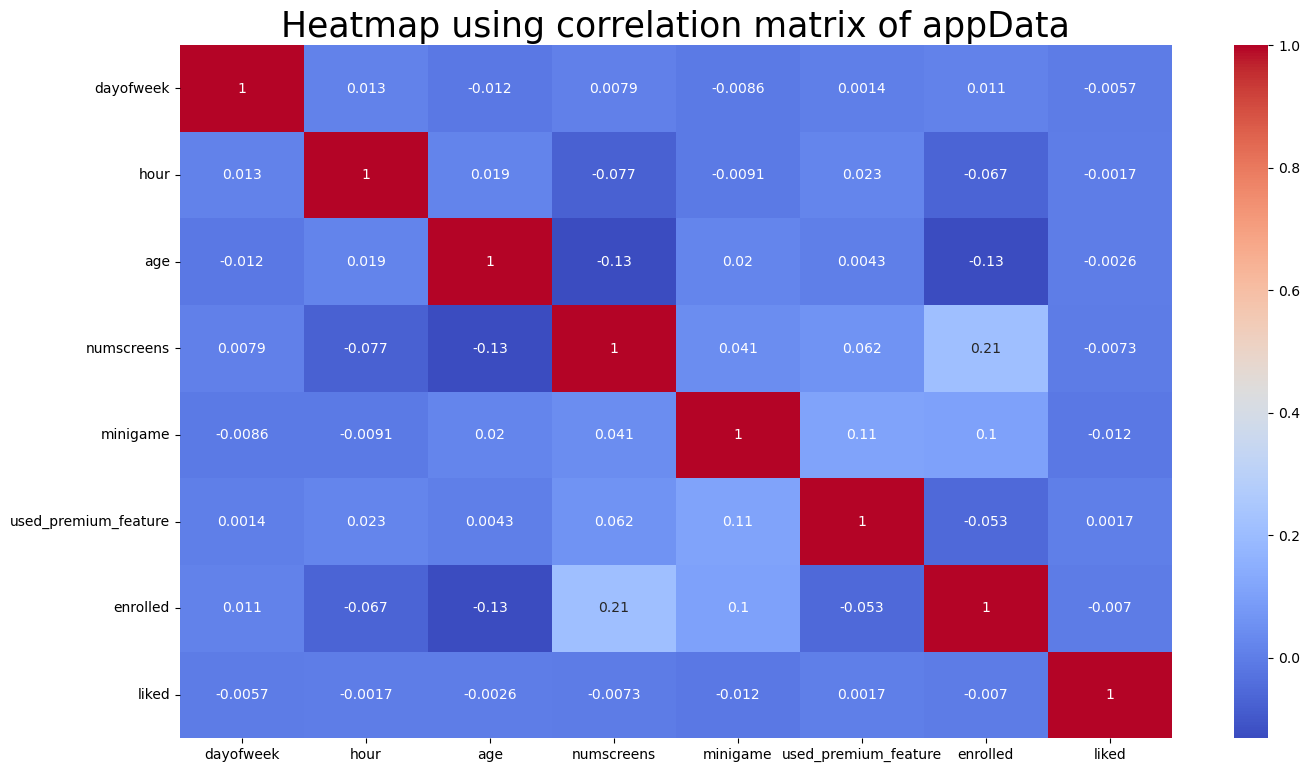

In [16]:
# Heatmap
plt.figure(figsize=(16,9));
sns.heatmap(appData.corr(), annot = True, cmap ='coolwarm');
# title of heatmap
plt.title("Heatmap using correlation matrix of appData",fontsize = 25); 
plt.show();

<Figure size 1600x900 with 0 Axes>

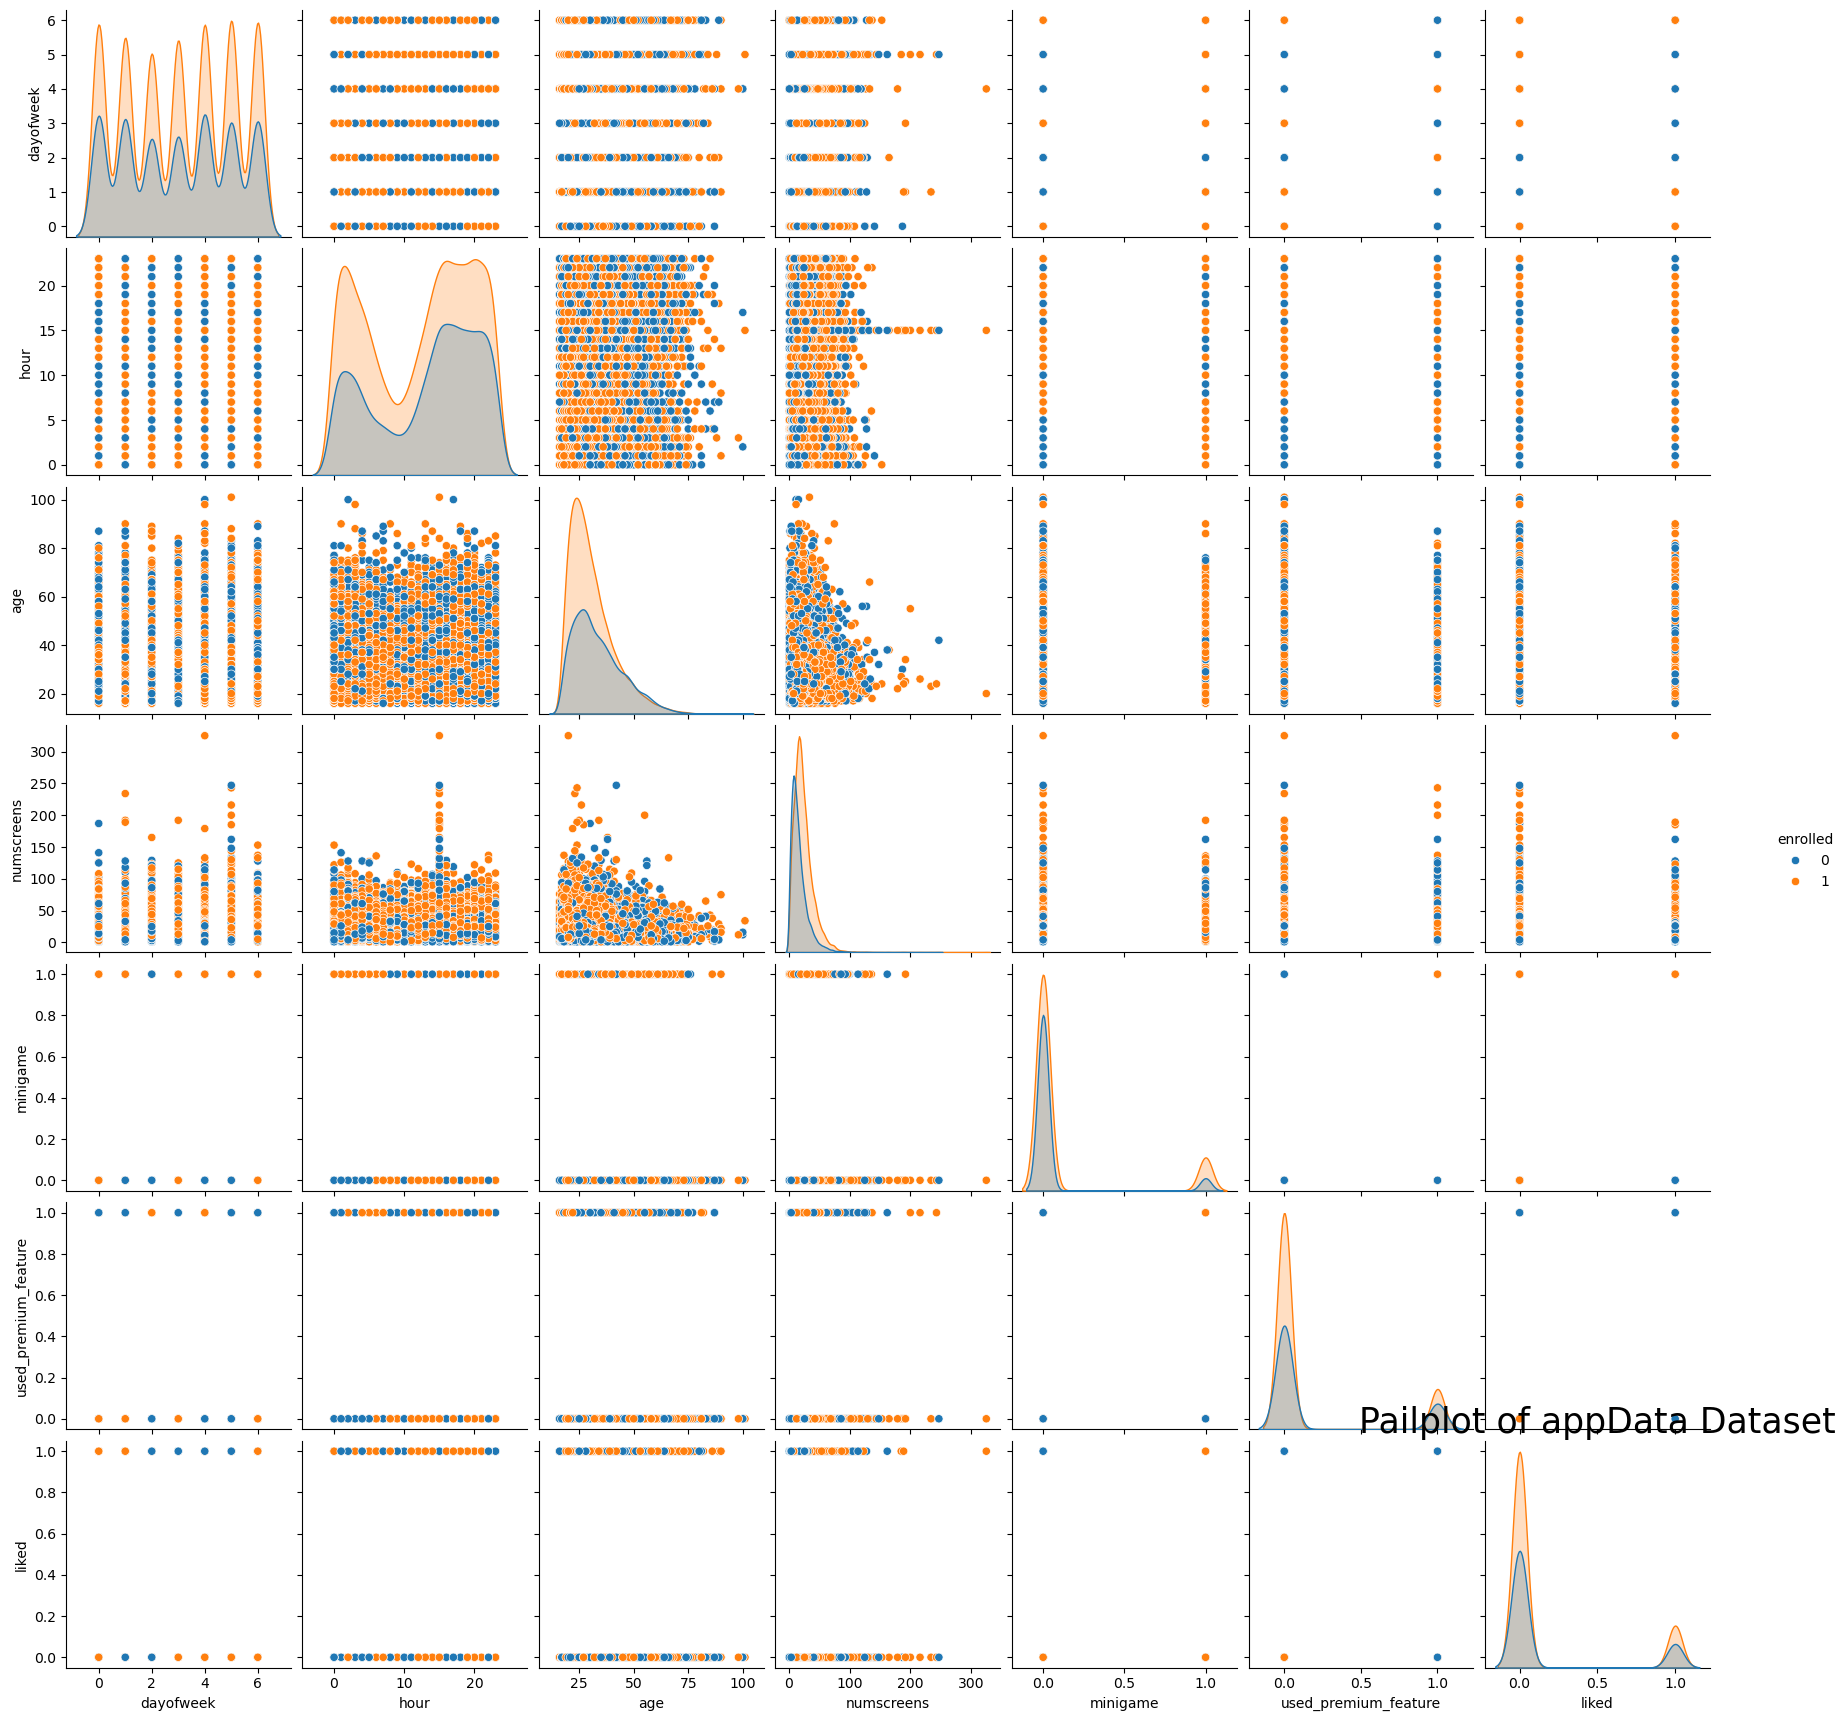

In [17]:
# Pailplot of appData Dataset
plt.figure(figsize=(16,9));
sns.pairplot(appData,hue = 'enrolled',kind='scatter');
plt.title("Pailplot of appData Dataset",fontsize = 25); 
plt.show();

<Figure size 1600x900 with 0 Axes>

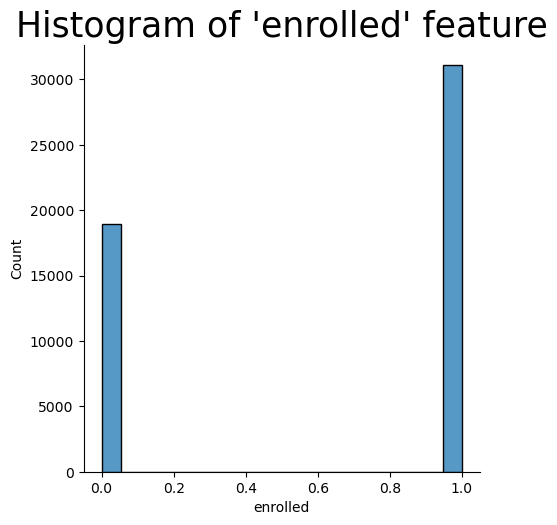

In [18]:
# Showing histogram of 'enrolled' feature
plt.figure(figsize=(16,9));
sns.displot(appData['enrolled']);
plt.title("Histogram of 'enrolled' feature",fontsize = 25); 
plt.show();

In [19]:
test1=(appData["enrolled"]<1)
print(test1)

0         True
1         True
2         True
3        False
4        False
         ...  
49995    False
49996     True
49997     True
49998    False
49999     True
Name: enrolled, Length: 50000, dtype: bool


In [20]:
no_of_not_enrolled_user=(appData["enrolled"]<1).sum();
print("out of 50000 user no of not enrolled user is = ",no_of_not_enrolled_user);

out of 50000 user no of not enrolled user is =  18926


In [21]:
no_of_enrolled_user=total_no_of_user-no_of_not_enrolled_user;
print("out of 50000 user no of enrolled user is = ",no_of_enrolled_user);

out of 50000 user no of enrolled user is =  31074


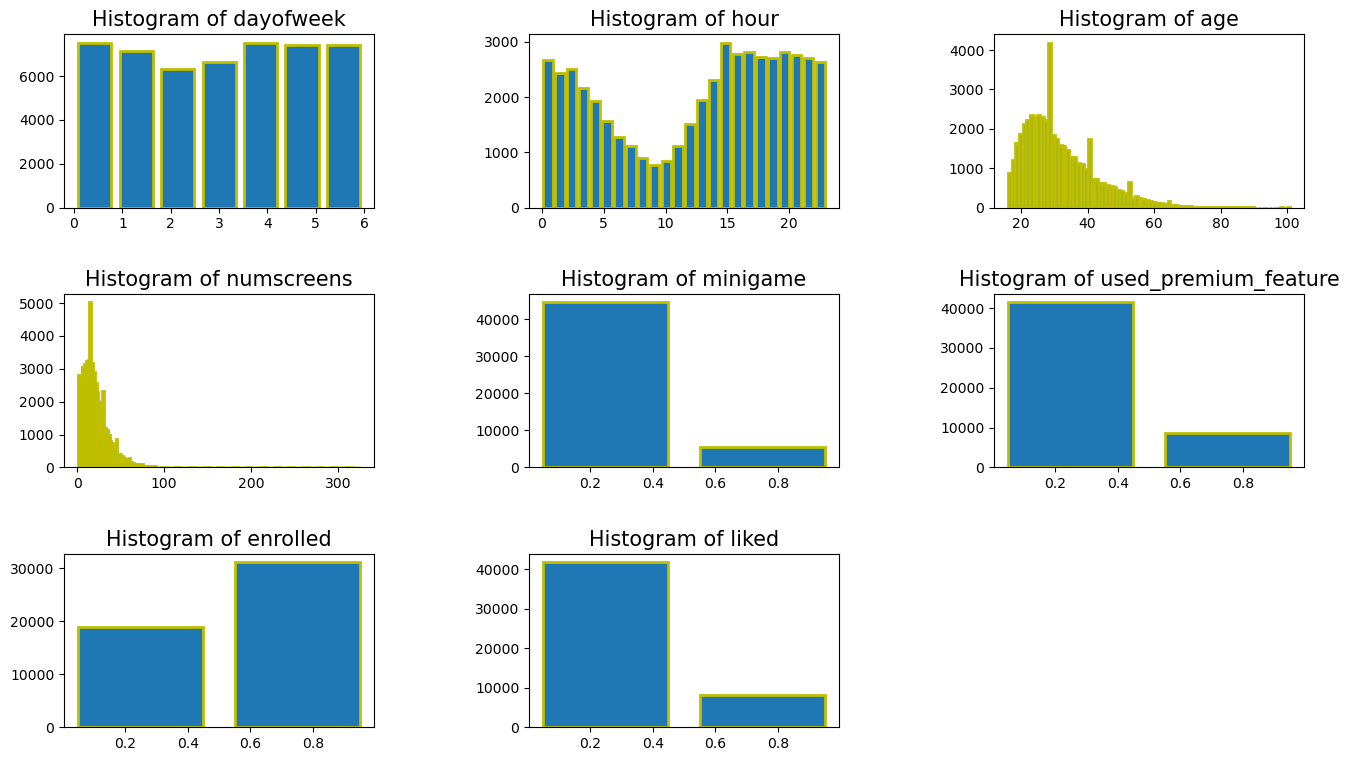

In [22]:
# plot histogram 
plt.figure(figsize = (16,9));
features =appData.columns;
for i,j in enumerate(features): 
    # create subplot for histogram
    plt.subplot(3,3,i+1);
    # title of histogram
    plt.title("Histogram of {}".format(j), fontsize = 15);
    # bins for histogram
    bins = len(appData[j].unique());
    # plot histogram
    plt.hist(appData[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2);
#space between horixontal axes (subplots)
plt.subplots_adjust(hspace=0.5,wspace=0.5);

In [23]:
for i,j in enumerate(features):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


fintech data 2
   dayofweek  hour  age  numscreens  minigame  used_premium_feature  liked
0          3     2   23          15         0                     0      0
1          6     1   24          13         0                     0      0
2          1    19   23           3         0                     1      1
3          4    16   28          40         0                     0      0
4          1    18   31          32         0                     0      1

fintech data 
   dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  


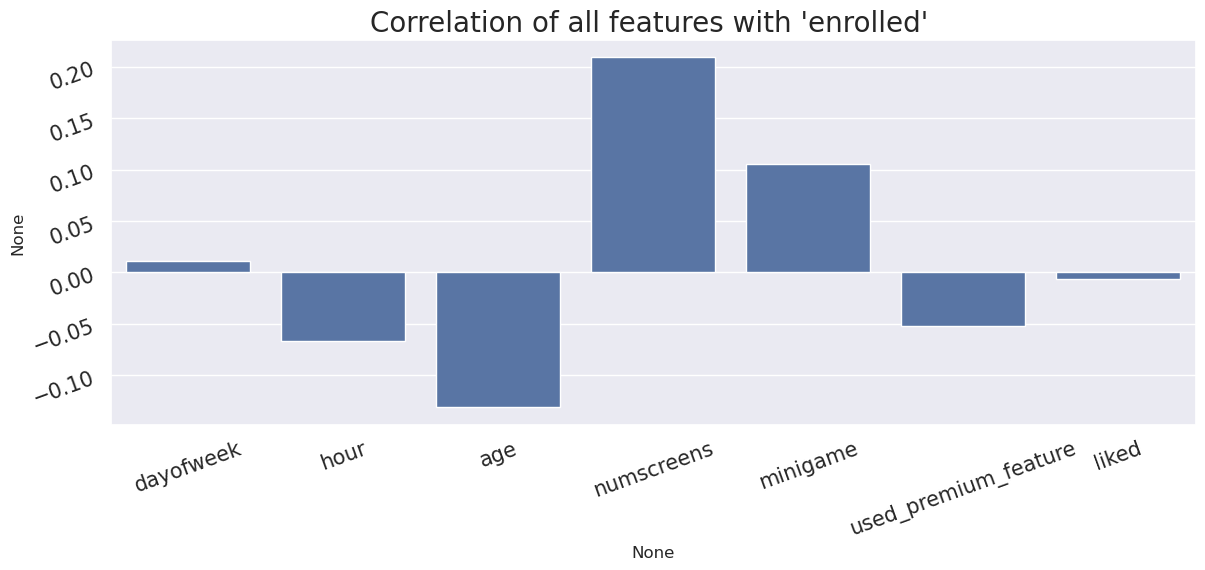

In [24]:
# show corelation barplot 
# set background dark grid
sns.set();
plt.figure(figsize = (14,5))
plt.title("Correlation of all features with 'enrolled' ", fontsize = 20)
# drop 'enrolled' feature
appData2 =appData.drop(['enrolled'], axis = 1);
print("fintech data 2");
print(appData2.head(5));
print();
print("fintech data ");
print(appData.head(5));
print();
print("next");
print();
print(appData2.corrwith(appData.enrolled));
print();
# plot barplot
ax =sns.barplot(x=appData2.columns,y=appData2.corrwith(appData.enrolled)); 
# decorate x & y ticks font 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k");

In [25]:
# parsing object data into data time format
appData1['first_open'] =[parser.parse(i) for i in appData1['first_open']];
print(appData1['first_open']);

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]


In [26]:
appData1['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in appData1['enrolled_date']];
print(appData1["enrolled_date"]);


0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]


In [27]:
print(appData1.dtypes);

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object


In [28]:
appData1['time_to_enrolled']  = (appData1.enrolled_date - appData1.first_open).astype('timedelta64[ns]');
print(appData1.head(5));

     user              first_open  dayofweek       hour  age  \
0  235136 2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588 2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414 2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192 2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549 2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled           enrolled_date  liked  \
0                     0         0                     NaT      0   
1         

In [29]:
print(appData1.dtypes);

user                              int64
first_open               datetime64[ns]
dayofweek                         int64
hour                             object
age                               int64
screen_list                      object
numscreens                        int64
minigame                          int64
used_premium_feature              int64
enrolled                          int64
enrolled_date            datetime64[ns]
liked                             int64
time_to_enrolled        timedelta64[ns]
dtype: object


In [30]:
appData1.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open','hour'], inplace=True);
print(appData1.columns);

Index(['user', 'dayofweek', 'age', 'screen_list', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')


In [31]:
# read csv file and convert it into numpy array
app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values;
print(app_screen_Data);
print("next1");
print(type(app_screen_Data));

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker']
next1
<class 'numpy.ndarray'>


In [32]:
# Add ',' at the end of each string of  'sreen_list' for further operation.
appData1['screen_list'] =appData1.screen_list.astype(str) + ',';
print(appData1.columns);
print("next1");
print(appData1.head(5));

Index(['user', 'dayofweek', 'age', 'screen_list', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')
next1
     user  dayofweek  age                                        screen_list  \
0  235136          3   23  idscreen,joinscreen,Cycle,product_review,ScanP...   
1  333588          6   24  joinscreen,product_review,product_review2,Scan...   
2  254414          1   23                                 Splash,Cycle,Loan,   
3  234192          4   28  product_review,Home,product_review,Loan3,Finan...   
4   51549          1   31  idscreen,joinscreen,Cycle,Credit3Container,Sca...   

   numscreens  minigame  used_premium_feature  enrolled  liked  
0          15         0                     0         0      0  
1          13         0                     0         0      0  
2           3         0                     1         0      1  
3          40         0                     0         1      0  
4          32         0              

In [33]:
# string into to number
for screen_name in app_screen_Data:
    appData1[screen_name] = appData1.screen_list.str.contains(screen_name).astype(int);
    appData1['screen_list'] =appData1.screen_list.str.replace(screen_name+",", "");
    
# test
appData1.screen_list.str.contains('Splash').astype(int);
# test
appData1.screen_list.str.replace('Splash'+",", "");
print(appData1.shape);
print("next1");
print(appData1.head(5));
print("next2");
# remain screen in 'screen_list'
print(appData1.loc[0,'screen_list']);

(50000, 67)
next1
     user  dayofweek  age                                        screen_list  \
0  235136          3   23  joinscreen,product_review,ScanPreview,VerifyTo...   
1  333588          6   24  joinscreen,product_review,product_review2,Scan...   
2  254414          1   23                                                      
3  234192          4   28  product_review,Home,product_review,ReferralCon...   
4   51549          1   31  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...   

   numscreens  minigame  used_premium_feature  enrolled  liked  Loan2  ...  \
0          15         0                     0         0      0      1  ...   
1          13         0                     0         0      0      1  ...   
2           3         0                     1         0      1      0  ...   
3          40         0                     0         1      0      0  ...   
4          32         0                     0         1      1      1  ...   

   ProfileJobTitle  Login  Profi

In [34]:
print(appData1.screen_list.str.count(",").head(6));

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64


In [35]:
# count remain screen list and store counted number in 'remain_screen_list'
appData1['remain_screen_list'] =appData1.screen_list.str.count(",");
# Drop the 'screen_list'
appData1.drop(columns = ['screen_list'], inplace=True);
print(appData1.head(5));
print("next1");
print(appData1.columns);

     user  dayofweek  age  numscreens  minigame  used_premium_feature  \
0  235136          3   23          15         0                     0   
1  333588          6   24          13         0                     0   
2  254414          1   23           3         0                     1   
3  234192          4   28          40         0                     0   
4   51549          1   31          32         0                     0   

   enrolled  liked  Loan2  location  ...  Login  ProfileEmploymentLength  \
0         0      0      1         0  ...      1                        0   
1         0      0      1         1  ...      0                        0   
2         0      1      0         0  ...      0                        0   
3         1      0      0         1  ...      0                        0   
4         1      1      1         0  ...      0                        0   

   WebView  SecurityModal  Loan4  ResendToken  TransactionList  \
0        0              0      0      

In [36]:
print(appData1.dtypes);

user                  int64
dayofweek             int64
age                   int64
numscreens            int64
minigame              int64
                      ...  
ResendToken           int64
TransactionList       int64
NetworkFailure        int64
ListPicker            int64
remain_screen_list    int64
Length: 67, dtype: object


In [37]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ];
print("next1");
print(appData1[saving_screens]);
appData1['saving_screens_count'] =appData1[saving_screens].sum(axis = 1);
appData1.drop(columns = saving_screens, inplace = True);
print("next2");
print(appData1);

next1
       Saving1  Saving2  Saving2Amount  Saving4  Saving5  Saving6  Saving7  \
0            0        0              0        0        0        0        0   
1            0        0              0        0        0        0        0   
2            0        0              0        0        0        0        0   
3            0        0              0        0        0        0        0   
4            0        0              0        0        0        0        0   
...        ...      ...            ...      ...      ...      ...      ...   
49995        0        0              0        0        0        0        0   
49996        0        0              0        0        0        0        0   
49997        0        0              0        0        0        0        0   
49998        0        0              0        0        0        0        0   
49999        0        1              1        0        1        1        1   

       Saving8  Saving9  Saving10  
0            0       

In [38]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
appData1['credit_screens_count'] =appData1[credit_screens].sum(axis = 1);
appData1.drop(columns = credit_screens, axis = 1, inplace = True);
print("next1");
print(appData1);

next1
         user  dayofweek  age  numscreens  minigame  used_premium_feature  \
0      235136          3   23          15         0                     0   
1      333588          6   24          13         0                     0   
2      254414          1   23           3         0                     1   
3      234192          4   28          40         0                     0   
4       51549          1   31          32         0                     0   
...       ...        ...  ...         ...       ...                   ...   
49995  222774          3   32          13         0                     0   
49996  169179          1   35           4         0                     1   
49997  302367          2   39          25         0                     0   
49998  324905          6   27          26         0                     0   
49999   27047          4   25          26         0                     0   

       enrolled  liked  Loan2  location  ...  WebView  SecurityModal 

In [39]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ];
appData1['cc_screens_count'] =appData1[cc_screens].sum(axis = 1);
appData1.drop(columns = cc_screens, inplace = True);
print("next1");
print(appData1);

next1
         user  dayofweek  age  numscreens  minigame  used_premium_feature  \
0      235136          3   23          15         0                     0   
1      333588          6   24          13         0                     0   
2      254414          1   23           3         0                     1   
3      234192          4   28          40         0                     0   
4       51549          1   31          32         0                     0   
...       ...        ...  ...         ...       ...                   ...   
49995  222774          3   32          13         0                     0   
49996  169179          1   35           4         0                     1   
49997  302367          2   39          25         0                     0   
49998  324905          6   27          26         0                     0   
49999   27047          4   25          26         0                     0   

       enrolled  liked  Loan2  location  ...  SecurityModal  Loan4  \

In [40]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ];
appData1['loan_screens_count'] =appData1[loan_screens].sum(axis = 1);
appData1.drop(columns = loan_screens, inplace = True);
print("next1");
print(appData1.head(5));
print("next2");
print(appData1.shape);
print("next3");
print(appData1.info());
print("next4");
print(appData1.describe());

next1
     user  dayofweek  age  numscreens  minigame  used_premium_feature  \
0  235136          3   23          15         0                     0   
1  333588          6   24          13         0                     0   
2  254414          1   23           3         0                     1   
3  234192          4   28          40         0                     0   
4   51549          1   31          32         0                     0   

   enrolled  liked  location  Institutions  ...  SecurityModal  ResendToken  \
0         0      0         0             0  ...              0            0   
1         0      0         1             1  ...              0            0   
2         0      1         0             0  ...              0            0   
3         1      0         1             0  ...              0            0   
4         1      1         0             1  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
0         

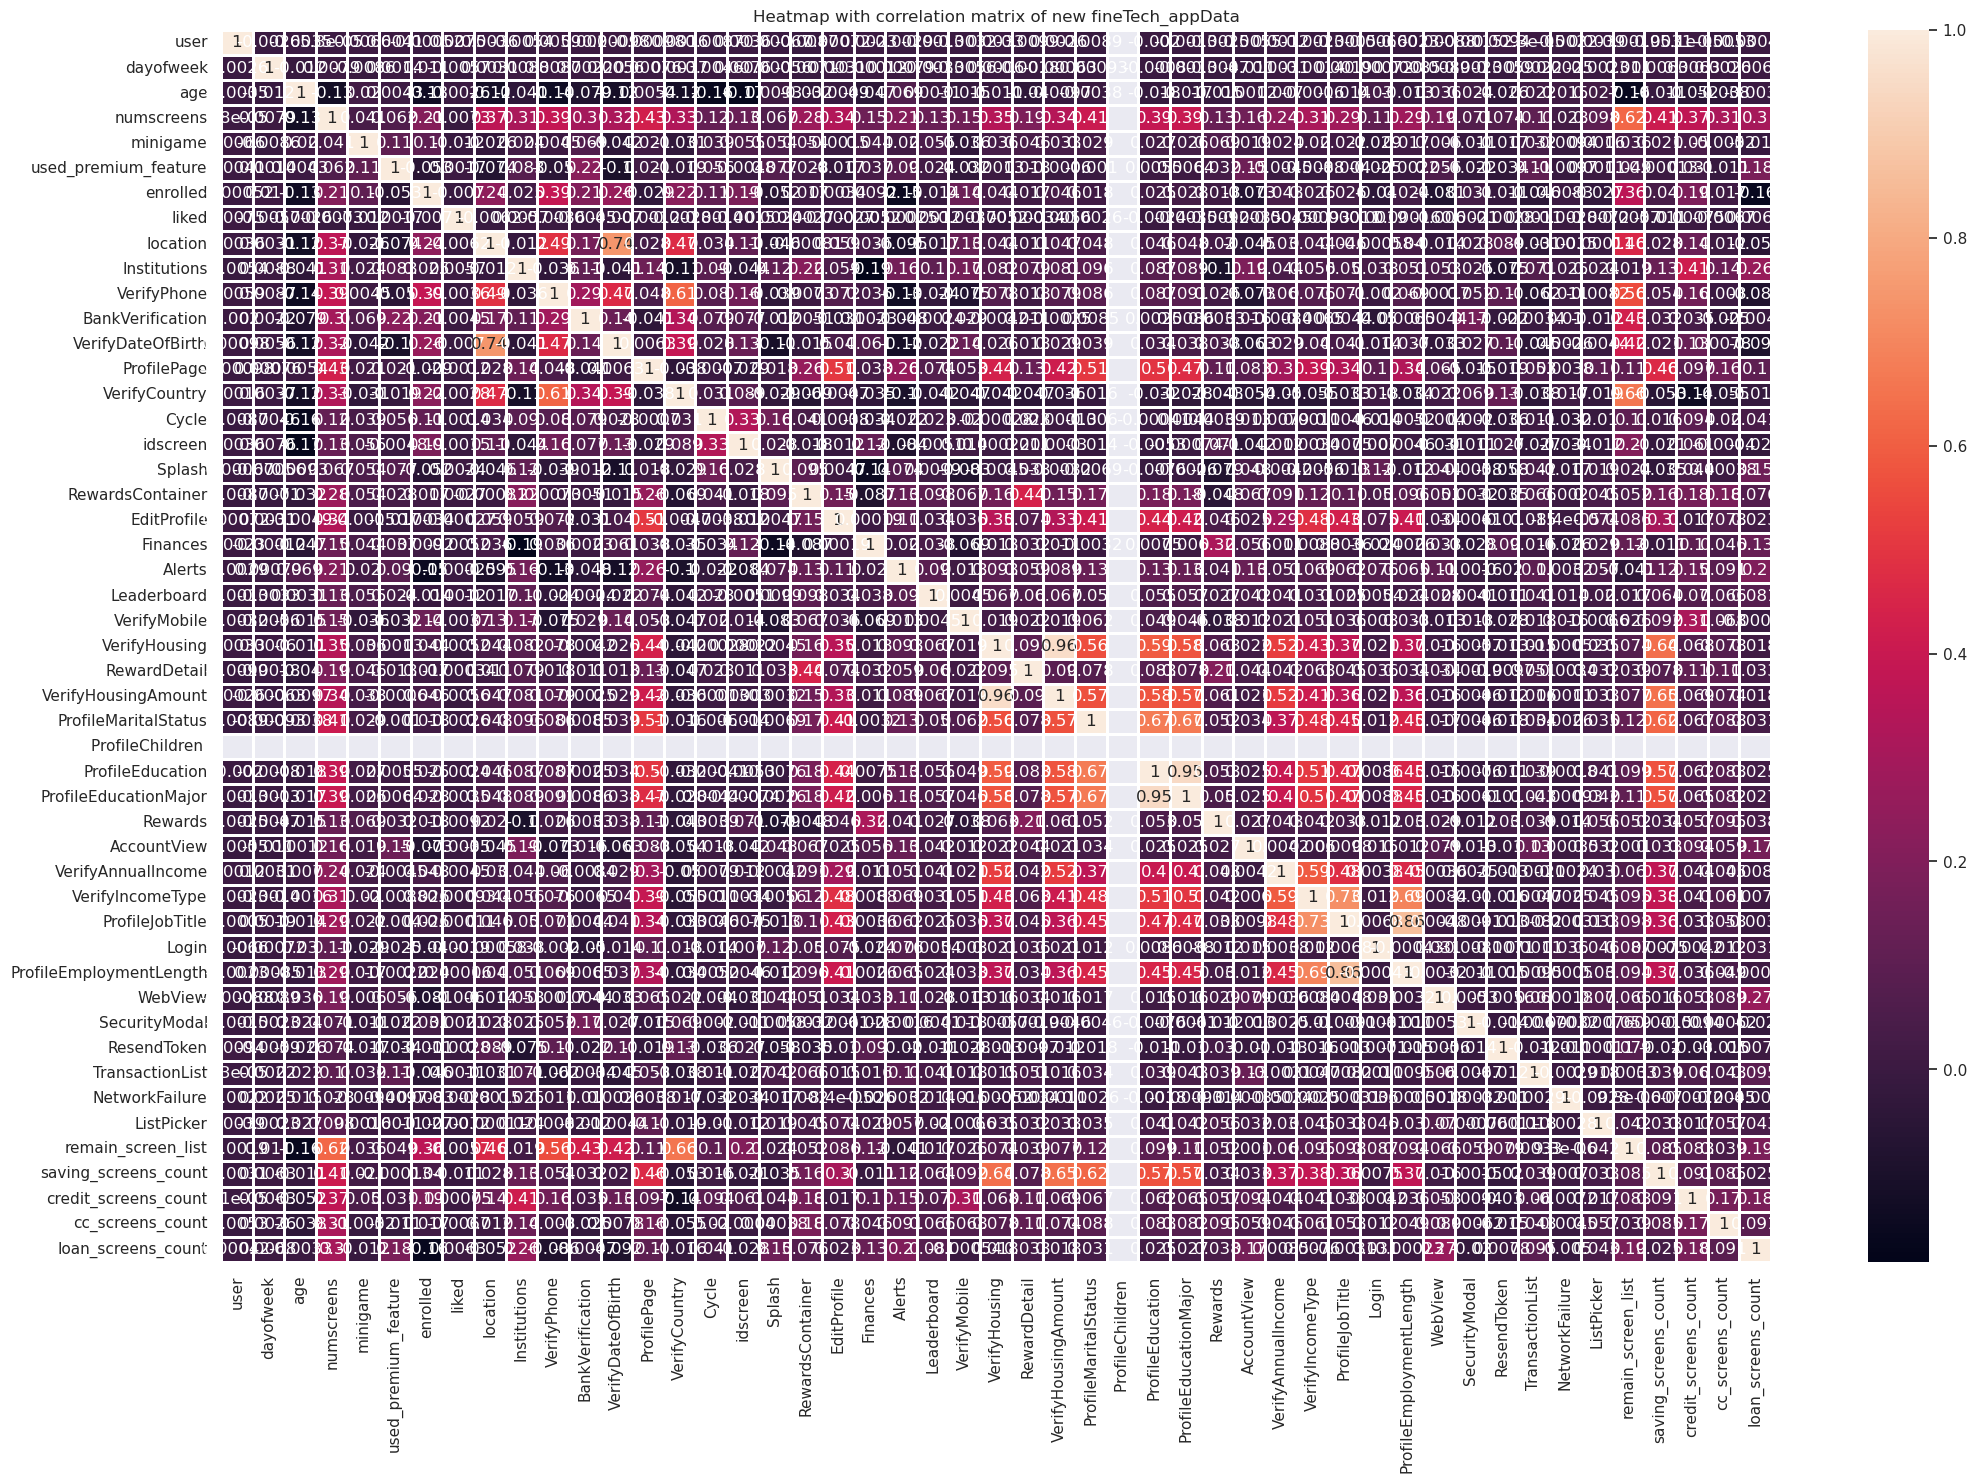

In [41]:
# Heatmap with correlation matrix of new fineTech_appData
plt.figure(figsize = (25,16)) 
sns.heatmap(appData1.corr(), annot = True, linewidth =2);
plt.title("Heatmap with correlation matrix of new fineTech_appData");
plt.show();

In [42]:
print("next1");
print(appData1.columns);
print("next2");
print(appData1['ProfileChildren '].unique());
print("next3");
corr_matrix =appData1.corr()
print(corr_matrix['ProfileChildren ']);
print("next4");
print(appData1['ProfileChildren ']);

next1
Index(['user', 'dayofweek', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screens_count', 'credit_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')
next2
[0]
next3
user                      NaN
dayofweek                 

In [43]:
#final cleaning data
clean_fineTech_appData =appData1;
target = clean_fineTech_appData['enrolled']; 
clean_fineTech_appData.drop(columns = 'enrolled', inplace = True);
print(clean_fineTech_appData.head(5));

     user  dayofweek  age  numscreens  minigame  used_premium_feature  liked  \
0  235136          3   23          15         0                     0      0   
1  333588          6   24          13         0                     0      0   
2  254414          1   23           3         0                     1      1   
3  234192          4   28          40         0                     0      0   
4   51549          1   31          32         0                     0      1   

   location  Institutions  VerifyPhone  ...  SecurityModal  ResendToken  \
0         0             0            1  ...              0            0   
1         1             1            1  ...              0            0   
2         0             0            0  ...              0            0   
3         1             0            1  ...              0            0   
4         0             1            1  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  remain_screen_list  

In [53]:
#splitting clean data into train and test.
from sklearn.model_selection import train_test_split;
x_train, x_test, y_train, y_test = train_test_split(clean_fineTech_appData, target, test_size = 0.2, random_state = 0);
print('Shape of x_train = ', x_train.shape);
print('Shape of x_test = ', x_test.shape);
print('Shape of y_train = ', y_train.shape);
print('Shape of y_test = ', y_test.shape);

Shape of x_train =  (40000, 48)
Shape of x_test =  (10000, 48)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [54]:
# take User ID in another variable 
train_userID = x_train['user'];
x_train.drop(columns= 'user',axis=1,inplace =True);
test_userID = x_test['user'];
x_test.drop(columns= 'user',axis=1,inplace =True);

In [55]:
print('Shape of X_train = ', x_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 47)
Shape of X_test =  (10000, 47)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [56]:
#feature scaling
from sklearn.preprocessing import StandardScaler;
ss=StandardScaler();
ss.fit(x_train);
X_train_ss=ss.transform(x_train);
X_test_ss=ss.transform(x_test);

In [57]:
# importing required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score;

In [58]:
#model building

In [59]:
# 1.Decision tree
# train without scalling dataset
from sklearn.tree import DecisionTreeClassifier;
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0);
dt_model.fit(x_train, y_train);
y_pred_x_test = dt_model.predict(x_test);
print(accuracy_score(y_test, y_pred_x_test));

0.7083


In [60]:
# train with Standard Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0);
dt_model2.fit(X_train_ss, y_train);
y_pred_x_test_ss = dt_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_x_test_ss));

0.7088


In [62]:
#2. KNN
# train without scalling dataset
from sklearn.neighbors import KNeighborsClassifier;
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,);
knn_model.fit(x_train, y_train);
y_pred_knn = knn_model.predict(x_test);
print(accuracy_score(y_test, y_pred_knn));

0.7112

In [63]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,);
knn_model2.fit(X_train_ss, y_train);
y_pred_knn_sc = knn_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_knn_sc));

0.7423

In [68]:
# 3.Naive Bayes
# train without scalling dataset
from sklearn.naive_bayes import GaussianNB;
nb_model = GaussianNB();
nb_model.fit(x_train, y_train);
y_pred_nb = nb_model.predict(x_test);
print(accuracy_score(y_test, y_pred_nb));

0.7004


In [69]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB();
nb_model2.fit(X_train_ss, y_train);
y_pred_nb_sc = nb_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_nb_sc));

0.7004


In [71]:
#4.Random Forest Classifier
# train without scalling dataset
from sklearn.ensemble import RandomForestClassifier;
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0);
rf_model.fit(x_train, y_train);
y_pred_rf = rf_model.predict(x_test);
print(accuracy_score(y_test, y_pred_rf));

0.756


In [75]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0);
rf_model2.fit(X_train_ss, y_train);
y_pred_rf_sc = rf_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_rf_sc));

0.7585


In [78]:
# 5 Logistic Regression
# train without scalling dataset
from sklearn.linear_model import LogisticRegression;
lr_model = LogisticRegression(random_state = 0, penalty = 'l2');
lr_model.fit(x_train, y_train);
y_pred_lr = lr_model.predict(x_test);
print(accuracy_score(y_test, y_pred_lr));

0.7491


/home/navin/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2');
lr_model2.fit(X_train_ss, y_train);
y_pred_lr_sc = lr_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_lr_sc));

0.749


In [80]:
# 6.Support Vector Machine
# train without scalling dataset
from sklearn.svm import SVC;
svc_model = SVC();
svc_model.fit(x_train, y_train);
y_pred_svc = svc_model.predict(x_test);
print(accuracy_score(y_test, y_pred_svc));

0.7435


In [82]:
# train with Standert Scaling dataset
svc_model2 = SVC();
svc_model2.fit(X_train_ss, y_train);
y_pred_svc_sc = svc_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_svc_sc));

0.772


In [87]:
#7.XGBoost Classifier
# train without scalling dataset
from xgboost import XGBClassifier;
xgb_model = XGBClassifier();
xgb_model.fit(x_train, y_train);
y_pred_xgb = xgb_model.predict(x_test);
print(accuracy_score(y_test, y_pred_xgb));

0.7827


In [88]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier();
xgb_model2.fit(X_train_ss, y_train);
y_pred_xgb_sc = xgb_model2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_xgb_sc));

0.7827


In [91]:
# XGB classifier with parameter tuning
# train without scalling dataset
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27);
xgb_model_pt1.fit(x_train, y_train);
y_pred_xgb_pt1 = xgb_model_pt1.predict(x_test);
print(accuracy_score(y_test, y_pred_xgb_pt1));

0.7856


In [92]:
# XGB classifier with parameter tuning
# train with Standert Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27);
xgb_model_pt2.fit(X_train_ss, y_train);
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_ss);
print(accuracy_score(y_test, y_pred_xgb_sc_pt2));

0.7856


In [94]:
# since xgboost model with different parameter give us highest accuracy we use that model ahead.

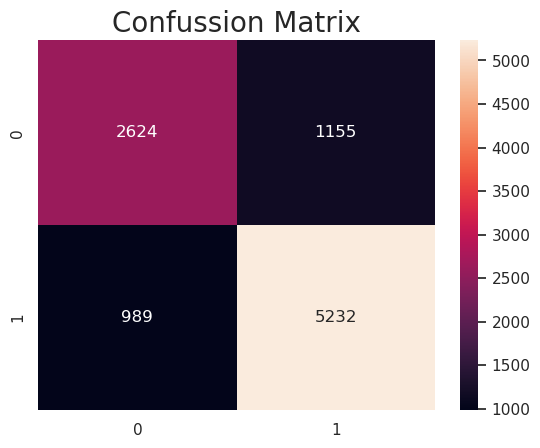

In [95]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2);
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g');
plt.title("Confussion Matrix", fontsize = 20);

In [97]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2);
print("Classification Report\n", cr_xgb_pt2);

Classification Report
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      3779
           1       0.82      0.84      0.83      6221

    accuracy                           0.79     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.78      0.79      0.78     10000



In [98]:
# Cross validation
from sklearn.model_selection import cross_val_score;
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_ss, y = y_train, cv = 10);
print("Cross validation of XGBoost model = ",cross_validation);
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean());

Cross validation of XGBoost model =  [0.79475 0.78375 0.79825 0.7955  0.8005  0.79375 0.7905  0.78875 0.7995
 0.7745 ]
Cross validation of XGBoost model (in mean) =  0.791975


In [99]:
final_result = pd.concat([test_userID, y_test], axis = 1);
final_result['predicted result'] = y_pred_xgb_sc_pt2;
print(final_result);

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 1

[10000 rows x 3 columns]


In [ ]:
#At last we compare model predict value with actual value for evaluation of model whether to use it or not.
#Now if we get all features value of any user then we can predict that user will buy premium features or not.